1. CARREGANDO E PREPARANDO OS DADOS

Carregando dataset PNS...

Dimensões do dataset: (20499, 50)

Primeiras 5 linhas:
   V0026  V0031  B001  C006  C009  C011  J001  J00101  J01101  N010  ...  \
0      1      1   2.0   2.0   3.0   3.0   3.0     2.0     1.0   1.0  ...   
1      1      1   2.0   2.0   4.0   1.0   3.0     2.0     1.0   1.0  ...   
2      1      1   2.0   1.0   1.0   2.0   2.0     1.0     1.0   1.0  ...   
3      1      1   2.0   2.0   3.0   1.0   2.0     2.0     3.0   1.0  ...   
4      1      1   2.0   2.0   1.0   1.0   2.0     2.0     3.0   2.0  ...   

   Exposicao_ruido  Exposicao_lixo  Exposicao_minerio  Dor_no_peito  \
0                2               2                  2           4.0   
1                2               2                  2           4.0   
2                2               2                  2           4.0   
3                2               2                  2           4.0   
4                2               2                  2           4.0  

Optimization Progress:   1%|          | 1/101 [00:06<11:22,  6.82s/it, best_trial=0, best_value=0.778]

[07:22:19] Hyperparameters optimization for Lvl_0_Pipe_0_Mod_1_Tuned_LightGBM completed
[07:22:19] Start fitting Lvl_0_Pipe_0_Mod_1_Tuned_LightGBM ...


[07:22:37] Fitting Lvl_0_Pipe_0_Mod_1_Tuned_LightGBM finished. score = 0.7635639722583067
[07:22:37] Lvl_0_Pipe_0_Mod_1_Tuned_LightGBM fitting and predicting completed
[07:22:37] Start fitting Lvl_0_Pipe_0_Mod_2_CatBoost ...
[07:22:57] Fitting Lvl_0_Pipe_0_Mod_2_CatBoost finished. score = 0.786087996455981
[07:22:57] Lvl_0_Pipe_0_Mod_2_CatBoost fitting and predicting completed
[07:22:57] Start hyperparameters optimization for Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost ... Time budget is 67.38 secs


Optimization Progress:  19%|█▉        | 19/101 [01:08<04:54,  3.59s/it, best_trial=15, best_value=0.8]  

[07:24:06] Hyperparameters optimization for Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost completed
[07:24:06] Start fitting Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost ...


[07:24:23] Fitting Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost finished. score = 0.7838191844668024
[07:24:23] Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost fitting and predicting completed
[07:24:23] Time left 126.41 secs

[07:24:23] Layer 1 training completed.

[07:24:23] Blending: optimization starts with equal weights. Score = 0.7888486
[07:24:23] Blending: iteration 0: score = 0.7896305, weights = [0.10087188 0.27619144 0.3469202  0.27601644]
[07:24:23] Blending: iteration 1: score = 0.7896385, weights = [0.11165379 0.2405316  0.35679707 0.29101753]
[07:24:24] Blending: iteration 2: score = 0.7896412, weights = [0.11447728 0.23587638 0.35817057 0.2914758 ]
[07:24:24] Blending: no improvements for score. Terminated.

[07:24:24] Blending: best score = 0.7896412, best weights = [0.11447728 0.23587638 0.35817057 0.2914758 ]
[07:24:24] Automl preset training completed in 175.20 seconds

[07:24:24] Model description:
Final prediction for new objects (level 0) = 
	 0.11448 * (5 averaged models Lvl_0_Pipe_0_Mo

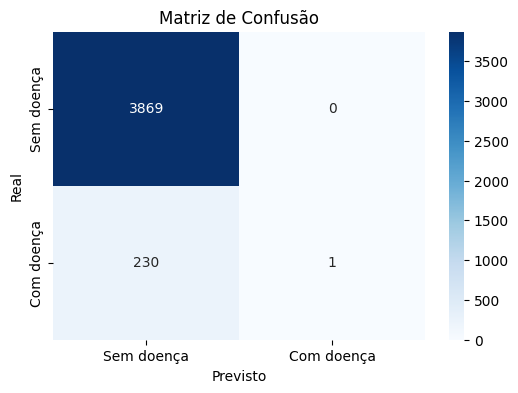


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3869
           1       1.00      0.00      0.01       231

    accuracy                           0.94      4100
   macro avg       0.97      0.50      0.49      4100
weighted avg       0.95      0.94      0.92      4100


6. IMPORTÂNCIA DAS VARIÁVEIS

Importância das features:
                     feature   importance
0               Dor_no_peito  7502.981220
1                     P04501  3284.215028
2                     P04502  3073.951931
3                       Q060  3047.931632
4                       J001  2746.405494
5                      Renda  2683.002651
6                     P02601  2513.546432
7               Escolaridade  2473.742500
8                       P018  2394.468834
9                     P00901  2223.579745
10                      N010  2211.061733
11                      C011  2206.635369
12         Tempo_parou_fumar  1865.178312

C:\Users\llays\AppData\Local\Temp\ipykernel_16160\2787488561.py:174: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature',


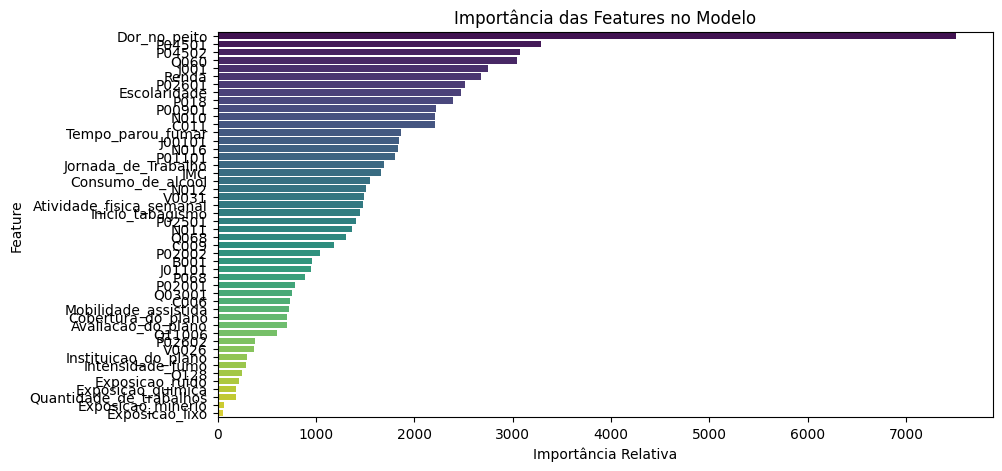

In [1]:
import pandas as pd
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, 
                            confusion_matrix, 
                            classification_report)
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================================
# 1. CARREGAMENTO E PRÉ-PROCESSAMENTO DOS DADOS
# ==============================================

print("="*50)
print("1. CARREGANDO E PREPARANDO OS DADOS")
print("="*50)

# Carregar dataset PNS
print("\nCarregando dataset PNS...")
data = pd.read_csv('../Bases/Criados/5.1_base_reduzida.csv')

data = data.drop('C008', axis=1)
data = data.drop('Q00201', axis=1)
data = data.drop('V0001', axis=1)

print(f"\nDimensões do dataset: {data.shape}")
print("\nPrimeiras 5 linhas:")
print(data.head())

# Pré-processamento básico
print("\nRealizando pré-processamento...")

# Mapeando a variável-alvo para 0 e 1
data['Q06306'] = data['Q06306'].map({1: 1, 2: 0})  # 1 = tem doença do coração, 2 = não tem

# Remover linhas com target ausente
data = data.dropna(subset=['Q06306'])

# Selecionar apenas colunas numéricas e categóricas válidas (AutoML lida com isso)
print("\nDados após preparação mínima:")
print(f"- Total de registros: {len(data)}")
print(f"- Proporção de pessoas com doença do coração: {data['Q06306'].mean():.2%}")
print("\nEstatísticas descritivas:")
print(data.describe(include='all'))

# ==============================================
# 2. DIVISÃO DOS DADOS EM TREINO E TESTE
# ==============================================

print("\n" + "="*50)
print("2. DIVIDINDO OS DADOS EM TREINO E TESTE")
print("="*50)

# Dividir em features e target
X = data.drop('Q06306', axis=1)
y = data['Q06306']

# Dividir em treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

print(f"\nDimensões dos conjuntos:")
print(f"- Treino: {X_train.shape[0]} amostras")
print(f"- Teste: {X_test.shape[0]} amostras")
print(f"\nProporção de classes no treino: {y_train.mean():.2%}")
print(f"Proporção de classes no teste: {y_test.mean():.2%}")

# ==============================================
# 3. CONFIGURAÇÃO DO MODELO AUTOML
# ==============================================

print("\n" + "="*50)
print("3. CONFIGURANDO O LIGHTAUTOML")
print("="*50)

task = Task('binary')
print("\nTarefa definida: Classificação Binária")

timeout = 300
cpu_limit = 4
algorithms = ['lgb', 'lgb_tuned', 'cb', 'cb_tuned']

print("\nConfiguração do AutoML:")
print(f"- Tempo máximo: {timeout} segundos")
print(f"- CPUs utilizadas: {cpu_limit}")
print(f"- Algoritmos: {algorithms}")

automl = TabularAutoML(
    task=task,
    timeout=timeout,
    cpu_limit=cpu_limit,
    general_params={
        'use_algos': [algorithms],
    },
    reader_params={
        'cv': 5,
        'random_state': 42
    }
)

# ==============================================
# 4. TREINAMENTO DO MODELO
# ==============================================

print("\n" + "="*50)
print("4. TREINANDO O MODELO")
print("="*50)

train_data = pd.concat([X_train, y_train], axis=1)

print("\nIniciando treinamento...")
oof_pred = automl.fit_predict(
    train_data, 
    roles={'target': 'Q06306'}, 
    verbose=1
)

print("\nTreinamento concluído!")

# ==============================================
# 5. AVALIAÇÃO DO MODELO
# ==============================================

print("\n" + "="*50)
print("5. AVALIANDO O MODELO")
print("="*50)

test_pred = automl.predict(X_test)
pred_labels = test_pred.data[:, 0].round()

accuracy = accuracy_score(y_test, pred_labels)
conf_matrix = confusion_matrix(y_test, pred_labels)
class_report = classification_report(y_test, pred_labels)

print(f"\nAcurácia no conjunto de teste: {accuracy:.4f}")

print("\nMatriz de Confusão:")
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Sem doença', 'Com doença'],
            yticklabels=['Sem doença', 'Com doença'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

print("\nRelatório de Classificação:")
print(class_report)

# ==============================================
# 6. ANÁLISE DE IMPORTÂNCIA DAS FEATURES
# ==============================================

print("\n" + "="*50)
print("6. IMPORTÂNCIA DAS VARIÁVEIS")
print("="*50)

try:
    feature_importances = automl.get_feature_scores('fast')
    
    if isinstance(feature_importances, pd.DataFrame):
        feature_importances.columns = ['feature', 'importance']
        feature_importances = feature_importances.sort_values('importance', ascending=False)
        
        print("\nImportância das features:")
        print(feature_importances)
        
        plt.figure(figsize=(10,5))
        sns.barplot(x='importance', y='feature', 
                   data=feature_importances, 
                   palette='viridis')
        plt.title('Importância das Features no Modelo')
        plt.xlabel('Importância Relativa')
        plt.ylabel('Feature')
        plt.show()
        
except Exception as e:
    print(f"\nErro ao obter importância das features: {str(e)}")
    
    try:
        if hasattr(automl.model, 'feature_importances_'):
            importances = automl.model.feature_importances_
            features = X_train.columns
            
            importance_df = pd.DataFrame({
                'feature': features,
                'importance': importances
            }).sort_values('importance', ascending=False)
            
            print(importance_df)
            
            plt.figure(figsize=(10,5))
            sns.barplot(x='importance', y='feature', 
                       data=importance_df, 
                       palette='viridis')
            plt.title('Importância das Features (Método Alternativo)')
            plt.xlabel('Importância Relativa')
            plt.ylabel('Feature')
            plt.show()
    except Exception as alt_e:
        print(f"\nTambém falhou ao tentar método alternativo: {str(alt_e)}")

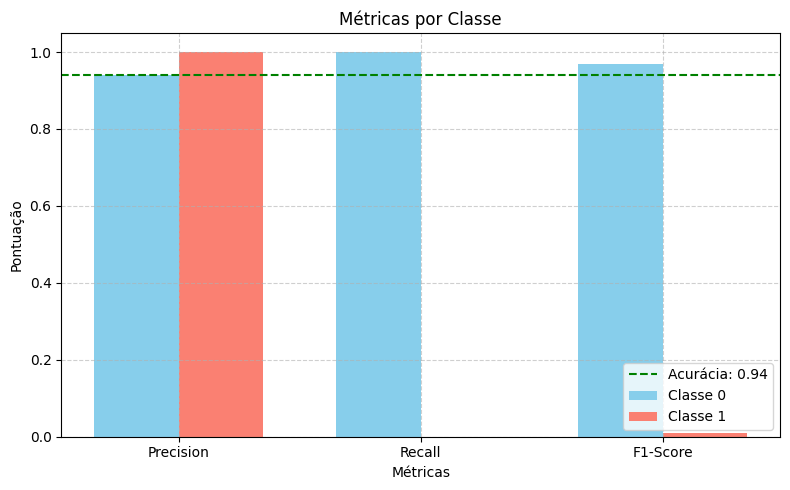

In [6]:
import matplotlib.pyplot as plt

# Métricas de exemplo (substitua pelos seus valores reais)
precision_0 = 0.94
precision_1 = 1.00
recall_0 = 1.00
recall_1 = 0.00
f1_0 = 0.97
f1_1 = 0.01
accuracy = 0.94

# Organização dos dados
metrics = ['Precision', 'Recall', 'F1-Score']
classes_0 = [precision_0, recall_0, f1_0]
classes_1 = [precision_1, recall_1, f1_1]

x = range(len(metrics))
bar_width = 0.35

# Criando o gráfico
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar([i - bar_width/2 for i in x], classes_0, bar_width, label='Classe 0', color='skyblue')
ax.bar([i + bar_width/2 for i in x], classes_1, bar_width, label='Classe 1', color='salmon')

# Adicionando a acurácia como linha horizontal
ax.axhline(y=accuracy, color='green', linestyle='--', label=f'Acurácia: {accuracy:.2f}')

# Estilização
ax.set_xlabel('Métricas')
ax.set_ylabel('Pontuação')
ax.set_title('Métricas por Classe')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.05)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

1. CARREGANDO E PREPARANDO OS DADOS

Proporção original da classe positiva: 5.63%

2. BALANCEANDO OS DADOS

Novo tamanho da base balanceada: (2308, 50)
Distribuição balanceada:
Q06306
1    1154
0    1154
Name: count, dtype: int64

Proporção no treino: 50.00%
Proporção no teste: 50.00%

4. CONFIGURANDO LIGHTAUTOML

Iniciando treinamento com dados balanceados...
[07:24:28] Stdout logging level is INFO.
[07:24:28] Task: binary

[07:24:28] Start automl preset with listed constraints:
[07:24:28] - time: 300.00 seconds
[07:24:28] - CPU: 4 cores
[07:24:28] - memory: 16 GB

[07:24:28] Train data shape: (1846, 50)

[07:24:28] Layer 1 train process start. Time left 299.43 secs
[07:24:29] Selector_LightGBM fitting and predicting completed
[07:24:30] Start fitting Lvl_0_Pipe_0_Mod_0_LightGBM ...
[07:24:34] Fitting Lvl_0_Pipe_0_Mod_0_LightGBM finished. score = 0.7748679760872091
[07:24:34] Lvl_0_Pipe_0_Mod_0_LightGBM fitting and predicting completed
[07:24:34] Start hyperparameters optimization for

Optimization Progress:  27%|██▋       | 27/101 [00:48<02:13,  1.81s/it, best_trial=14, best_value=0.775]

[07:25:23] Hyperparameters optimization for Lvl_0_Pipe_0_Mod_1_Tuned_LightGBM completed
[07:25:23] Start fitting Lvl_0_Pipe_0_Mod_1_Tuned_LightGBM ...


[07:25:24] Fitting Lvl_0_Pipe_0_Mod_1_Tuned_LightGBM finished. score = 0.7775460161586236
[07:25:25] Lvl_0_Pipe_0_Mod_1_Tuned_LightGBM fitting and predicting completed
[07:25:25] Start fitting Lvl_0_Pipe_0_Mod_2_CatBoost ...
[07:25:34] Fitting Lvl_0_Pipe_0_Mod_2_CatBoost finished. score = 0.7816660778069534
[07:25:34] Lvl_0_Pipe_0_Mod_2_CatBoost fitting and predicting completed
[07:25:34] Start hyperparameters optimization for Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost ... Time budget is 135.07 secs


Optimization Progress:  70%|███████   | 71/101 [02:15<00:57,  1.91s/it, best_trial=11, best_value=0.775]

[07:27:49] Hyperparameters optimization for Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost completed
[07:27:49] Start fitting Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost ...


[07:27:56] Fitting Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost finished. score = 0.7730033840848239
[07:27:56] Lvl_0_Pipe_0_Mod_3_Tuned_CatBoost fitting and predicting completed
[07:27:56] Time left 91.65 secs

[07:27:56] Layer 1 training completed.

[07:27:56] Blending: optimization starts with equal weights. Score = 0.7825605
[07:27:56] Blending: iteration 0: score = 0.7835817, weights = [0.         0.27010185 0.6118356  0.11806256]
[07:27:57] Blending: iteration 1: score = 0.7837214, weights = [0.06371193 0.25090414 0.5637557  0.12162827]
[07:27:57] Blending: no improvements for score. Terminated.

[07:27:57] Blending: best score = 0.7837214, best weights = [0.06371193 0.25090414 0.5637557  0.12162827]
[07:27:57] Automl preset training completed in 208.89 seconds

[07:27:57] Model description:
Final prediction for new objects (level 0) = 
	 0.06371 * (5 averaged models Lvl_0_Pipe_0_Mod_0_LightGBM) +
	 0.25090 * (5 averaged models Lvl_0_Pipe_0_Mod_1_Tuned_LightGBM) +
	 0.56376 * (5 averaged mo

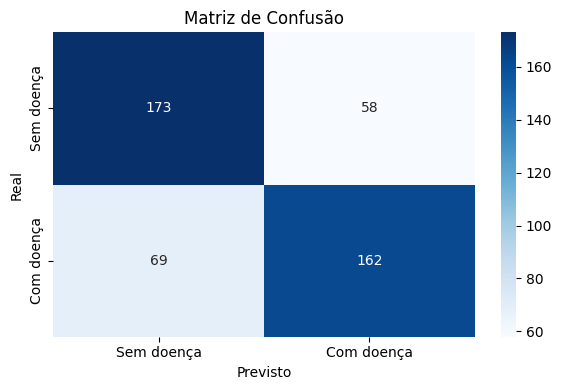


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       231
           1       0.74      0.70      0.72       231

    accuracy                           0.73       462
   macro avg       0.73      0.73      0.72       462
weighted avg       0.73      0.73      0.72       462


7. IMPORTÂNCIA DAS VARIÁVEIS
               feature   importance
0         Dor_no_peito  6724.057092
1                 Q060  1821.180866
2                 J001  1684.097458
3                 Q068  1113.323741
4                Renda   986.986920
5               J00101   901.928118
6    Tempo_parou_fumar   878.660157
7               P00901   856.431549
8  Jornada_de_Trabalho   851.427260
9               P04501   825.420720


C:\Users\llays\AppData\Local\Temp\ipykernel_16160\2434564105.py:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importances.head(15), palette='viridis')


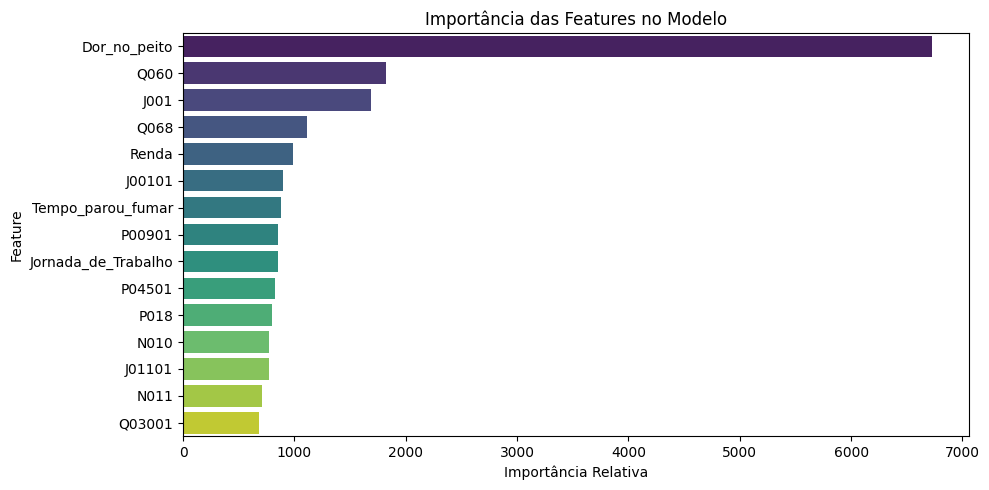

In [3]:
import pandas as pd
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

# ==============================================
# 1. CARREGAMENTO E PRÉ-PROCESSAMENTO DOS DADOS
# ==============================================

print("="*50)
print("1. CARREGANDO E PREPARANDO OS DADOS")
print("="*50)

data = pd.read_csv('../Bases/Criados/5.1_base_reduzida.csv')

# Remover colunas irrelevantes
data = data.drop(['C008', 'Q00201', 'V0001'], axis=1)

# Mapeia a variável-alvo
data['Q06306'] = data['Q06306'].map({1: 1, 2: 0})
data = data.dropna(subset=['Q06306'])

# Exibe proporção original
print(f"\nProporção original da classe positiva: {data['Q06306'].mean():.2%}")

# ==============================================
# 2. BALANCEAMENTO (undersampling simples)
# ==============================================

print("\n" + "="*50)
print("2. BALANCEANDO OS DADOS")
print("="*50)

classe_0 = data[data['Q06306'] == 0]
classe_1 = data[data['Q06306'] == 1]

min_tam = min(len(classe_0), len(classe_1))

classe_0_res = resample(classe_0, replace=False, n_samples=min_tam, random_state=42)
classe_1_res = resample(classe_1, replace=False, n_samples=min_tam, random_state=42)

data_bal = pd.concat([classe_0_res, classe_1_res]).sample(frac=1, random_state=42)

print(f"\nNovo tamanho da base balanceada: {data_bal.shape}")
print(f"Distribuição balanceada:\n{data_bal['Q06306'].value_counts()}")

# ==============================================
# 3. DIVISÃO DOS DADOS
# ==============================================

X = data_bal.drop('Q06306', axis=1)
y = data_bal['Q06306']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nProporção no treino: {y_train.mean():.2%}")
print(f"Proporção no teste: {y_test.mean():.2%}")

# ==============================================
# 4. AUTO ML CONFIG
# ==============================================

print("\n" + "="*50)
print("4. CONFIGURANDO LIGHTAUTOML")
print("="*50)

task = Task('binary')

automl = TabularAutoML(
    task=task,
    timeout=300,
    cpu_limit=4,
    general_params={
        'use_algos': [['lgb', 'lgb_tuned', 'cb', 'cb_tuned']],
    },
    reader_params={
        'cv': 5,
        'random_state': 42
    }
)

# ==============================================
# 5. TREINAMENTO
# ==============================================

train_data = pd.concat([X_train, y_train], axis=1)
print("\nIniciando treinamento com dados balanceados...")
oof_pred = automl.fit_predict(train_data, roles={'target': 'Q06306'}, verbose=1)
print("Treinamento concluído!")

# ==============================================
# 6. AVALIAÇÃO
# ==============================================

test_pred = automl.predict(X_test)
pred_labels = test_pred.data[:, 0].round()

accuracy = accuracy_score(y_test, pred_labels)
conf_matrix = confusion_matrix(y_test, pred_labels)
class_report = classification_report(y_test, pred_labels)

print(f"\nAcurácia: {accuracy:.4f}")

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Sem doença', 'Com doença'],
            yticklabels=['Sem doença', 'Com doença'])
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.tight_layout()
plt.show()

print("\nRelatório de Classificação:")
print(class_report)

# ==============================================
# 7. IMPORTÂNCIA DAS FEATURES
# ==============================================

print("\n" + "="*50)
print("7. IMPORTÂNCIA DAS VARIÁVEIS")
print("="*50)

try:
    feature_importances = automl.get_feature_scores('fast')
    if isinstance(feature_importances, pd.DataFrame):
        feature_importances.columns = ['feature', 'importance']
        feature_importances = feature_importances.sort_values('importance', ascending=False)

        print(feature_importances.head(10))

        plt.figure(figsize=(10, 5))
        sns.barplot(x='importance', y='feature', data=feature_importances.head(15), palette='viridis')
        plt.title('Importância das Features no Modelo')
        plt.xlabel('Importância Relativa')
        plt.ylabel('Feature')
        plt.tight_layout()
        plt.show()
except Exception as e:
    print(f"\nErro ao obter importância das features: {str(e)}")

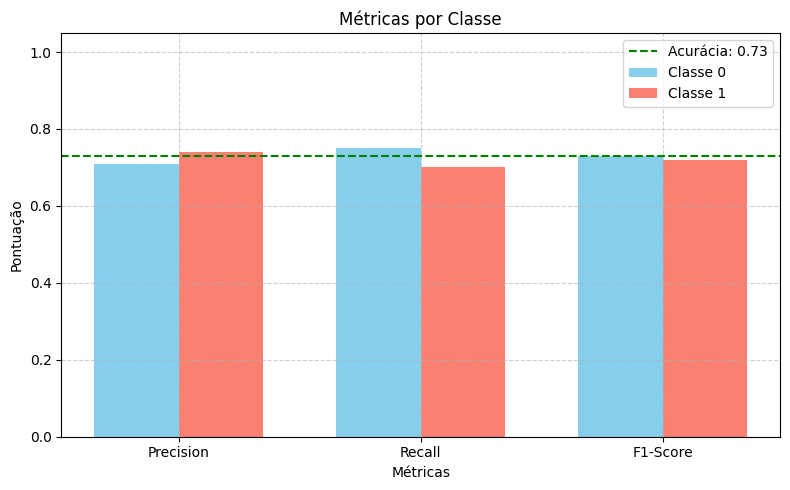

In [5]:
import matplotlib.pyplot as plt

# Métricas de exemplo (substitua pelos seus valores reais)
precision_0 = 0.71
precision_1 = 0.74
recall_0 = 0.75
recall_1 = 0.70
f1_0 = 0.73
f1_1 = 0.72
accuracy = 0.73

# Organização dos dados
metrics = ['Precision', 'Recall', 'F1-Score']
classes_0 = [precision_0, recall_0, f1_0]
classes_1 = [precision_1, recall_1, f1_1]

x = range(len(metrics))
bar_width = 0.35

# Criando o gráfico
fig, ax = plt.subplots(figsize=(8, 5))
ax.bar([i - bar_width/2 for i in x], classes_0, bar_width, label='Classe 0', color='skyblue')
ax.bar([i + bar_width/2 for i in x], classes_1, bar_width, label='Classe 1', color='salmon')

# Adicionando a acurácia como linha horizontal
ax.axhline(y=accuracy, color='green', linestyle='--', label=f'Acurácia: {accuracy:.2f}')

# Estilização
ax.set_xlabel('Métricas')
ax.set_ylabel('Pontuação')
ax.set_title('Métricas por Classe')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1.05)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()